## Import Libraries



In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Get the Data

Set index_col=0 to use the first column as the index.

In [22]:
Accepted_Papers = pd.read_csv("[UCI] AAAI-14 Accepted Papers - Papers.csv",index_col=0)
X = Accepted_Papers.iloc[:, [1, 2]].values

In [23]:
Accepted_Papers.head()

,authors,groups,keywords,topics,abstract
title,,,,,
Kernelized Bayesian Transfer Learning,Mehmet Gönen and Adam A. Margolin,Novel Machine Learning Algorithms (NMLA),cross-domain learning\ndomain adaptation\nkern...,APP: Biomedical / Bioinformatics\nNMLA: Bayesi...,Transfer learning considers related but distin...
"""Source Free"" Transfer Learning for Text Classification","Zhongqi Lu, Yin Zhu, Sinno Pan, Evan Xiang, Yu...",AI and the Web (AIW)\nNovel Machine Learning A...,Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,Transfer learning uses relevant auxiliary data...
A Generalization of Probabilistic Serial to Randomized Social Choice,Haris Aziz and Paul Stursberg,Game Theory and Economic Paradigms (GTEP),social choice theory\nvoting\nfair division\ns...,GTEP: Game Theory\nGTEP: Social Choice / Voting,The probabilistic serial (PS) rule is one of t...
Lifetime Lexical Variation in Social Media,"Liao Lizi, Jing Jiang, Ying Ding, Heyan Huang ...",NLP and Text Mining (NLPTM),Generative model\nSocial Networks\nAge Prediction,AIW: Web personalization and user modeling\nNL...,As the rapid growth of online social media att...
Hybrid Singular Value Thresholding for Tensor Completion,"Xiaoqin Zhang, Zhengyuan Zhou, Di Wang and Yi Ma",Knowledge Representation and Reasoning (KRR)\n...,tensor completion\nlow-rank recovery\nhybrid s...,KRR: Knowledge Representation (General/Other)\...,"In this paper, we study the low-rank tensor co..."


In [24]:
Accepted_Papers.describe()

,authors,groups,keywords,topics,abstract
count,398,396,398,394,398
unique,391,125,398,350,398
top,"Deguang Kong, Chris Ding and Qihe Pan",Novel Machine Learning Algorithms (NMLA),Equilibrium existence\nEquilibrium computation...,GTEP: Social Choice / Voting,Sequential learning for classification tasks i...
freq,3,50,1,7,1


In [25]:
Accepted_Papers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, Kernelized Bayesian Transfer Learning to Supervised Transfer Sparse Coding
Data columns (total 5 columns):
authors     398 non-null object
groups      396 non-null object
keywords    398 non-null object
topics      394 non-null object
abstract    398 non-null object
dtypes: object(5)
memory usage: 18.7+ KB


## EDA

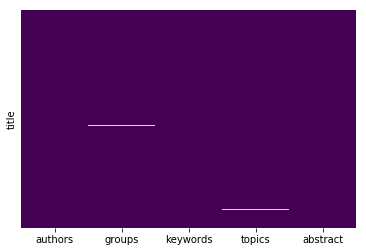

In [26]:
sns.heatmap(Accepted_Papers.isnull(),yticklabels=False,cbar=False,cmap='viridis')

No missing data

In [28]:
def matrix_from_Accepted_Papers(data_train):
 matrix = data_train.pivot_table(index = ['title'], columns=['groups'],
values='flags')
 matrix = matrix.fillna(0).reset_index()
 x_cols = matrix.columns[1:]
 return matrix, x_cols

In [29]:
data_train = pd.read_csv('[UCI] AAAI-14 Accepted Papers - Papers.csv')
data_train = data_train[['title', 'groups', 'keywords', 'topics']]
s = data_train['groups'].str.split('\n').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'groups'
del data_train['groups']
data_train = data_train.join(s).reset_index()
data_train['flags'] = pd.Series(np.ones(len(data_train)),
index=data_train.index)
data_train.head()

,index,title,keywords,topics,groups,flags
0,0,Kernelized Bayesian Transfer Learning,cross-domain learning\ndomain adaptation\nkern...,APP: Biomedical / Bioinformatics\nNMLA: Bayesi...,Novel Machine Learning Algorithms (NMLA),1.0
1,1,"""Source Free"" Transfer Learning for Text Class...",Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,AI and the Web (AIW),1.0
2,1,"""Source Free"" Transfer Learning for Text Class...",Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,Novel Machine Learning Algorithms (NMLA),1.0
3,2,A Generalization of Probabilistic Serial to Ra...,social choice theory\nvoting\nfair division\ns...,GTEP: Game Theory\nGTEP: Social Choice / Voting,Game Theory and Economic Paradigms (GTEP),1.0
4,3,Lifetime Lexical Variation in Social Media,Generative model\nSocial Networks\nAge Prediction,AIW: Web personalization and user modeling\nNL...,NLP and Text Mining (NLPTM),1.0


In [30]:
matrix, x_cols = matrix_from_df(data_train)

In [31]:
X = matrix[x_cols]
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters = 9, random_state = 2)
matrix['cluster'] = cluster.fit_predict(X)
matrix.cluster.value_counts()

0    81
1    78
5    44
3    38
6    36
2    32
8    30
7    30
4    27
Name: cluster, dtype: int64

The above results shows that how many items are their in above 9 clusters

In [32]:
cluster.cluster_centers_

array([[  1.38777878e-17,   5.55111512e-17,   6.17283951e-02,
          8.64197531e-02,   8.64197531e-02,   2.46913580e-02,
         -5.55111512e-17,   1.35802469e-01,   1.04083409e-17,
          8.64197531e-02,  -1.11022302e-16,   1.66533454e-16,
          2.46913580e-02,   3.70370370e-02,   7.40740741e-02,
          6.17283951e-02,  -3.88578059e-16,   2.83950617e-01,
          1.85185185e-01,   1.11111111e-01,   0.00000000e+00,
          1.23456790e-01],
       [  7.69230769e-02,   1.28205128e-02,   1.28205128e-02,
          1.28205128e-02,   1.28205128e-02,  -1.90819582e-17,
         -5.55111512e-17,   2.56410256e-02,   1.28205128e-02,
          1.28205128e-02,  -1.11022302e-16,   1.66533454e-16,
          0.00000000e+00,  -3.81639165e-17,   5.12820513e-02,
          1.28205128e-02,   1.00000000e+00,   1.28205128e-02,
          1.02564103e-01,   0.00000000e+00,   1.28205128e-02,
          6.41025641e-02],
       [  2.77555756e-17,   4.16333634e-17,   1.04083409e-17,
         -2.0816

In [34]:
type(cluster.labels_)
df2 = pd.DataFrame(cluster.labels_)
df.append(df2)
df.head()

C:\Users\Vrun\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:77: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


,authors,groups,keywords,topics,abstract
title,,,,,
Kernelized Bayesian Transfer Learning,Mehmet Gönen and Adam A. Margolin,Novel Machine Learning Algorithms (NMLA),cross-domain learning\ndomain adaptation\nkern...,APP: Biomedical / Bioinformatics\nNMLA: Bayesi...,Transfer learning considers related but distin...
"""Source Free"" Transfer Learning for Text Classification","Zhongqi Lu, Yin Zhu, Sinno Pan, Evan Xiang, Yu...",AI and the Web (AIW)\nNovel Machine Learning A...,Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,Transfer learning uses relevant auxiliary data...
A Generalization of Probabilistic Serial to Randomized Social Choice,Haris Aziz and Paul Stursberg,Game Theory and Economic Paradigms (GTEP),social choice theory\nvoting\nfair division\ns...,GTEP: Game Theory\nGTEP: Social Choice / Voting,The probabilistic serial (PS) rule is one of t...
Lifetime Lexical Variation in Social Media,"Liao Lizi, Jing Jiang, Ying Ding, Heyan Huang ...",NLP and Text Mining (NLPTM),Generative model\nSocial Networks\nAge Prediction,AIW: Web personalization and user modeling\nNL...,As the rapid growth of online social media att...
Hybrid Singular Value Thresholding for Tensor Completion,"Xiaoqin Zhang, Zhengyuan Zhou, Di Wang and Yi Ma",Knowledge Representation and Reasoning (KRR)\n...,tensor completion\nlow-rank recovery\nhybrid s...,KRR: Knowledge Representation (General/Other)\...,"In this paper, we study the low-rank tensor co..."
